# Does faculty salary vary by sex and/or rank?
A visual and statistical (i.e., `t-test`) approach.

## Set up
Let's begin by reading in some data from [this course website](http://data.princeton.edu/wws509/datasets/#salary). Columns included are:

- **sx** = Sex, coded 1 for female and 0 for male
- **rk** = Rank, coded
    - 1 for assistant professor,
    - 2 for associate professor, and
    - 3 for full professor
- **yr** = Number of years in current rank
- **dg** = Highest degree, coded 1 if doctorate, 0 if masters
- **yd** = Number of years since highest degree was earned
- **sl** = Academic year salary, in dollars.

In [2]:
# Set up
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
import urllib.request # to load data
from scipy import stats # ANOVA
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import altair as alt
alt.renderers.enable('notebook') # enable altair rendering
import matplotlib.pyplot as plt # plotting (optional)
%matplotlib inline 

In [3]:
# Read data from URL
data = urllib.request.urlopen('http://data.princeton.edu/wws509/datasets/salary.dat')
salary_data= pd.read_table(data, sep='\s+')

## Descriptive statistics by sex

Before doing any statistical tests, you should get a basic feel for the sex breakdown in your dataset

In [6]:
# What is the number of males/females in the dataset? What does this already tell you...?
male = len(salary_data[salary_data['sx']=='male'])
print(male)

female = len(salary_data[salary_data['sx']=='female'])
print(female)

38
14


In [7]:
# What is the mean salary by sex? Hint: you'll have to groupby sex (`sx`)
mean_salary = salary_data.groupby(['sx']).mean()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1381e828>,
      dtype=object)

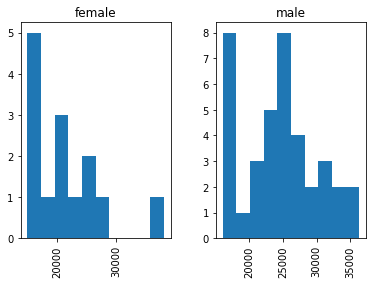

In [8]:
# Draw histograms for the distribution of salaries for males and females (either separately, or overlapping)
# Hint: you can use the `.hist` method of a dataframe and specify what you want to separate *by*, or
# Use altair to create a layered historgram (https://altair-viz.github.io/gallery/layered_histogram.html)
salary_data[['sx', 'sl']].hist(by='sx')

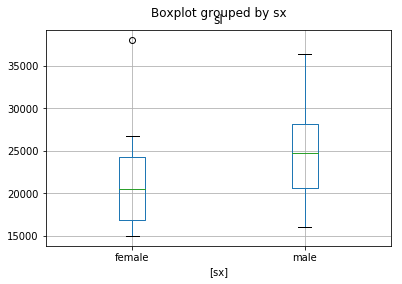

In [9]:
# Create a boxplot of the salaries by sex (i.e., on one plot have boxes for each sex)
# See an example here: https://seaborn.pydata.org/generated/seaborn.boxplot.html
salary_data[['sx', 'sl']].boxplot(by='sx')

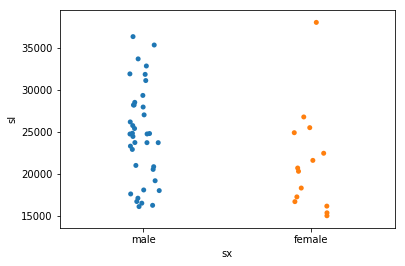

In [10]:
# Another great way to see these two distributions is using a stripplot (jittered density plot)
# Show salary distributions for males and females in a stripplot
# Use the sns.stripplot method (https://seaborn.pydata.org/generated/seaborn.stripplot.html)
sns.stripplot(x=salary_data['sx'], y=salary_data['sl'], jitter=True)

## Test for a difference in means by sex
Use a t-test to see if there is a significant difference in means

In [15]:
# Use the `ttest_ind` method to perform a t-test assessing differences in salary for male/female faculty
# (you may find it helpful to create separate data frames for the male and female observations -- optional)
males = salary_data[salary_data['sx']=='male']
females = salary_data[salary_data['sx']=='female']
stats.ttest_ind(males['sl'], females['sl'])

Ttest_indResult(statistic=1.8474402832932844, pvalue=0.07060393644390568)

### Write an interpretation of the results of your t-test here

## Descriptive Statistics by Rank

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a15d61240>,
      dtype=object)

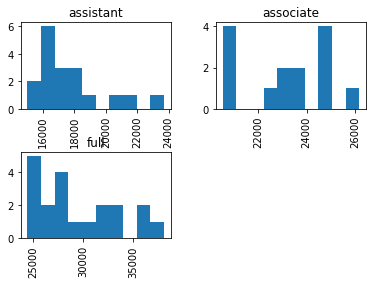

In [16]:
# Draw histograms for the distribution of salaries by rank (`rk`)
# Again, you can choose to make separate historgrams, or overlay them

salary_data[['rk', 'sl']].hist(by='rk')

## Test for differences in means by rank

First, we'll want to leverage the **t-test** to test for differences by rank. To do this, we'll need to take the rank variable `rk` (which has **3 categories**) and use it to define a _new variable_ that has only **two categories** (full professor, and _not_ full professor). Once create these two groupings (full professors, not full professors),  you can perform a t-test to assess the difference in salary between the two groups.

In [19]:
# Create a new column representing this new grouping of faculty (full, not_full)
full = salary_data[salary_data['rk']=='full']
not_full = salary_data[salary_data['rk']!='full']

# Use a t-test to asssess the difference in mean salary between these two groups
stats.ttest_ind(full['sl'], not_full['sl'])

Ttest_indResult(statistic=9.13361444071646, pvalue=3.0965017065059518e-12)

### Write an interpretation of the results of your t-test here

Alternatively, we could use an **Analysis of Variance (ANOVA)** test (an extension of the t-test) to assess the statistical significance in differences across the three faculty rankings (assistant, associate, full). To do this, simply pass 3 (or more!) sets of data into the `stats.f_oneway()` method to check for the significance of difference in means across groups. Your interpretation of the p-value will be the same as for the t-test. 

In [20]:
# Use the ANOVA method to test for differences in means by rank (this time, all 3 ranks)
# Specifically, Uue the `stats.f_oneway` method to perform the test
# You may find it helpful to break the data into separate data frames first (optional)

stats.f_oneway(full['sl'], not_full['sl'])

F_onewayResult(statistic=83.42291275166428, pvalue=3.0965017065059457e-12)

### Write an interpretation of the results of your t-test here

## How does salary (`sl`) compare to years since degress (`yd`) and years in current rank (`yr`)?

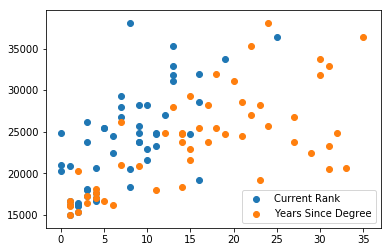

In [21]:
# Create scatterplots to show how salary (`sl`) compares to years since degree (`yd`) / in current rank (`yr`)
# Ideally, place these adjacent to one another (not required, but it's a good skill to learn)
p1 = plt.scatter(x=salary_data['yr'], y=salary_data['sl'], label='Current Rank')
p2 = plt.scatter(x=salary_data['yd'], y=salary_data['sl'], label='Years Since Degree')
plt.legend(handles=[p1, p2])

## How does salary vary across rank and sex?
To view this continuous variable (`sl`) broken down by two categorical variables (`rk` and `sx`), create the following graphics. It may help to sketch these first (by hand) to make sure you know what visual layout you are trying to make. Once you figure that out, review the documentation for the visualization package of your choice, keeping an eye out for ways to `facet` the charts.

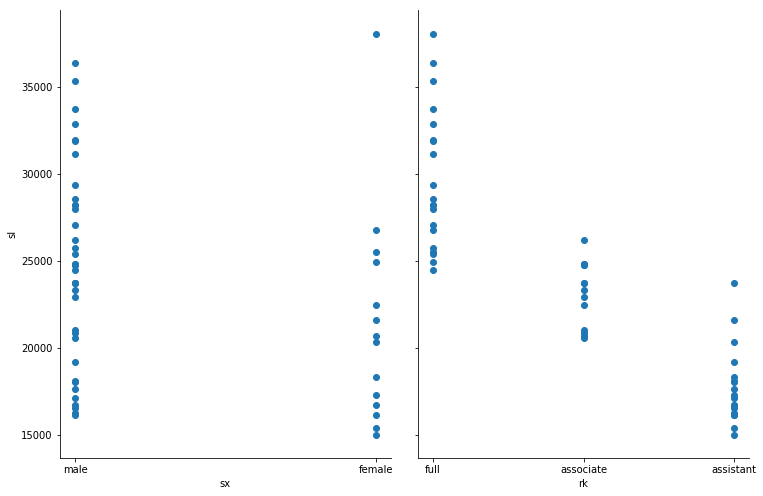

In [22]:
# For each rank, show the distribution of salary (`sl`) for each sex (`sx`)
# For example, you could have three charts (one for each faculty ranking), and for each one, show 
# a stripplot/histogram/boxbplot/violinplot with different markers for each sex 
g = sns.PairGrid(salary_data,x_vars=['sx','rk'],
                   y_vars=['sl'],
                 aspect=.75, size=7)
g.map(plt.scatter)

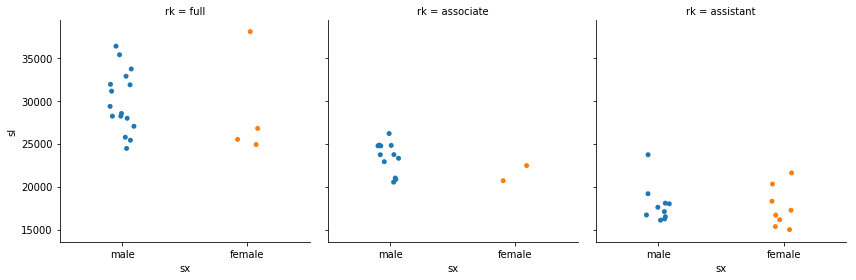

In [24]:
# For each sex, show the distribution of salary (`sl`) for each rank (`rk`)
# For example, you could have two charts (one for males, one for females), and for each one, show 
# a stripplot/histogram/boxbplot/violinplot with different markers for each rank
sns.factorplot(x = 'sx', y = 'sl', col = 'rk', data = salary_data, kind = "strip", jitter = True)




### Write an interpretation of the results of your t-test here
What do these charts tell you about sex discrimination on the faculty?

```These charts suggest that women make less money than males do for the same job```